# **PCA And Kmeans Cluster project**


***


## Objectives

Author: Joshua_kab


In this project I would demonstrate the PCA algorithm techniques, which is going to help me to reduce the number of the feature to the most relevant. than after I will be able to perform K-means cluster algorithm to segment customers expenditure pattern in the dataset selected  




## Use cases of PCA

*   Facial Recognition
*   Image Compression
*   Finding patterns in data of high dimension in the field of quantitative finance.



In this notebook, we'ill explore how to simplify and reduce the dimensionality of various data using **principle component analysis** (PCA) then Apply Kmeans Cluster


## **Table of Contents**

* Objectives
* Dataset
* Requires Libraries
* PCA Libraries
* K-Means
* Visual data
* Conclusion
* Recommendation



## Datasets

Problem Description
A Chinese automobile company Teclov_chinese aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the customer purchase habit of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
• The company want to separate the customers segmenting into groups depending on their purchasing habits.
The dataset consist of the following features:  car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price.



## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for additional plotting tools.


### Importing Required Libraries


In [1]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#from tqdm import tqdm
import numpy as np
import pandas as pd
from itertools import accumulate

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import multivariate_normal
from itertools import chain
from matplotlib.patches import Ellipse


sns.set_context('notebook')
sns.set_style('white')
from scipy.stats import loguniform

warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

### Defining Helper Functions

Below, we define helper functions to simplify your code later on:


In [2]:
def plot_explained_variance(pca):
    # This function graphs the accumulated explained variance ratio for a fitted PCA object.
    acc = [*accumulate(pca.explained_variance_ratio_)]
    fig, ax = plt.subplots(1, figsize=(50, 20))
    ax.stackplot(range(pca.n_components_), acc)
    ax.scatter(range(pca.n_components_), acc, color='black')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, pca.n_components_-1)
    ax.tick_params(axis='both', labelsize=36)
    ax.set_xlabel('N Components', fontsize=48)
    ax.set_ylabel('Accumulated explained variance', fontsize=48)
    plt.tight_layout()
    plt.show()

### What does PCA do?

*   Reduces the dimensionality of data. By reducing data dimensionality, PCA can also help with visualization.
*   May reduce noise in the process

\-Can be used to pre-process data improving the result of your algorithm


### How does PCA work? (optional)

1.  Looks at an $n$ -dimensional dataset and breaks it down into "general trends" or **components**

```
- When we say "$n$-dimensional", we mean the data has $n$ features.
```

2.  The components are then **sorted by how much of the explained variance they account for** (*eigenvalues* provide this information)

```
- This means if a component is highly-uncorrelated with all others, it's a "strong" component and provides useful information that is very hard to infer from all other components.
```

3.  Then, given some parameter (usually chosen by the data engineer), the new dimension of the data is decided. Let this be $k$.

```
- Note $k$ is always $k \leq n$ because we're only trying to reduce the dimension of our data.
```

4.  Finally, the original $n$ dimensional dataset is projected onto the $k$-dimensional plane chosen by our **top-$k$ components that take care of the most explained variance**.

```
- These top- $k$ components are now used
```

Because principle components span an (at most) $k$-dimensional surface, we have successfully reduced our data to at least $k \leq n$ dimensions!


## Visual Example

Let's look at an example that will visually demonstrate PCA in action.

Load the dataset `CarPrice_Assignment.csv` which contains a list of various car's parts


In [3]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Let's check the dataset before apply any of the Reduction dimensions model

In [4]:
data.dtypes.value_counts()

object     10
int64       8
float64     8
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


Remove the caname column since it won't be much use in theis project

In [7]:
data.drop(['car_ID','CarName','stroke'],axis=1, inplace=True)

In [8]:
categorical_feature = data.select_dtypes(include='object')
numerical_feature = data.select_dtypes(include=np.number)

In [9]:
categorical_feature.describe().T

,count,unique,top,freq
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


## Exploratory Data analysis

Let's check the disribution of the all numeric columns

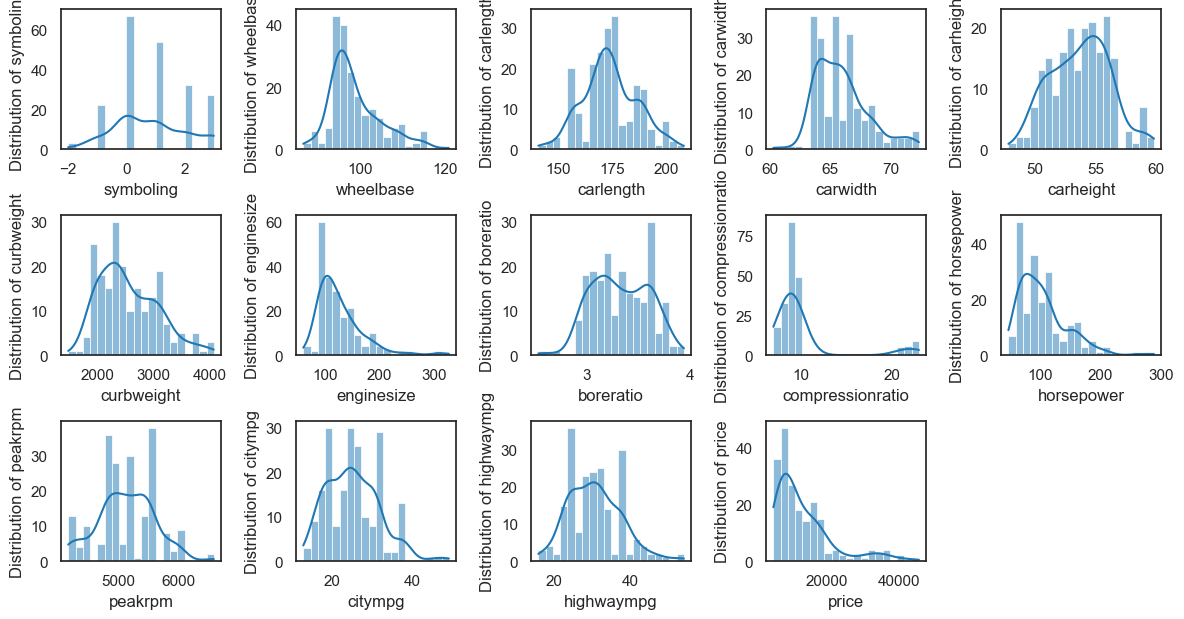

In [10]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Example to get numberic features

sns.color_palette("pastel")

plt.figure(figsize=(12, 10))

# Loop through numerical features
for i, column in enumerate(numerical_features, start=1):  # Use enumerate to get the index
    plt.subplot(5, 5, i)  # Adjust the number of rows and columns as needed
    sns.histplot(data[column], bins=20, kde=True, palette="rainbow")
    plt.xlabel(column)
    plt.ylabel(f'Distribution of {column}')

plt.tight_layout()
plt.show()

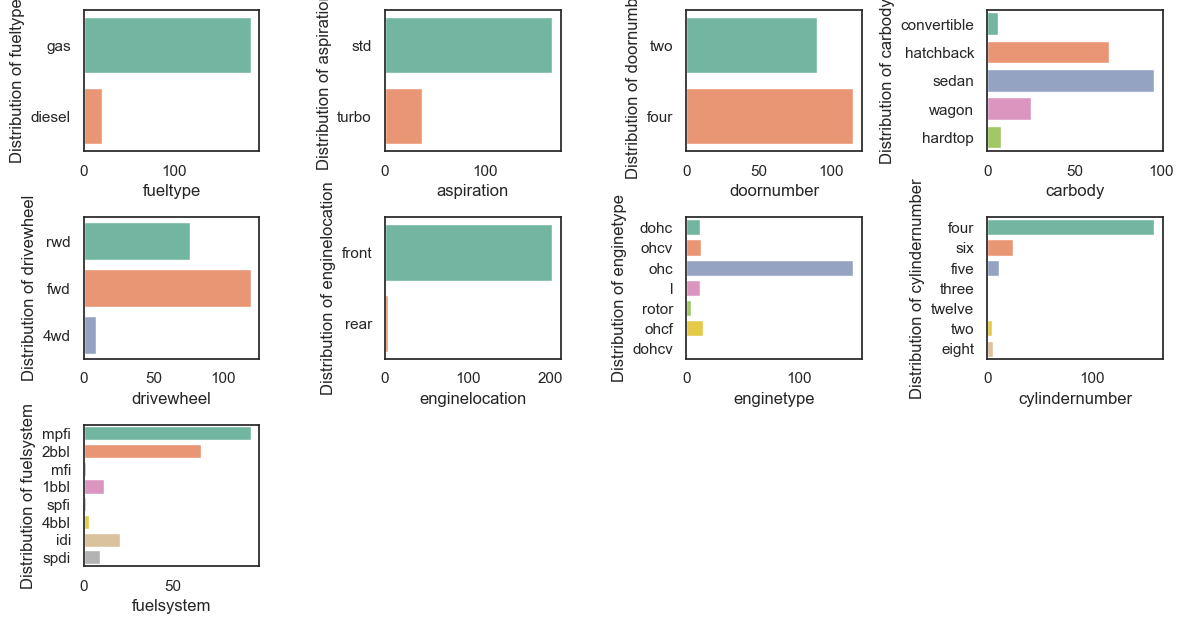

In [11]:
sns.color_palette("rainbow")

plt.figure(figsize=(12,8))

# Loop through numerical features
for i, column in enumerate(categorical_feature, start=1):  # Use enumerate to get the index
    plt.subplot(4, 4, i)  # Adjust the number of rows and columns as needed
    sns.countplot(data[column], palette='Set2' )
    plt.xlabel(column)
    plt.ylabel(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Insight: The above graph showed the categorical distribution of each column

In the following code will used the label encoder function to convert the categorical columnsto numerical values

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
# let encode the numeric values
for col in data.columns:
    data[col] = le.fit_transform(data[col])


In [13]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# The custom NumPy log transformer
log_transformer = FunctionTransformer(np.log1p)

# The pipeline
estimators = [('log1p', log_transformer), ('StandardScaler', StandardScaler())]
pipeline = Pipeline(estimators)

# Convert the original data
data_pipe = pipeline.fit_transform(data)

In [14]:
#sns.pairplot(data=data, palette='spring')

In [15]:
skew_df = data.skew().sort_values(ascending=False)
data_sk = skew_df.loc[skew_df > 0.5]

data_sk

enginelocation    8.143531
cylindernumber    2.144253
aspiration        1.673832
enginesize        0.650159
dtype: float64

Correkarion matrix

In [16]:
corr_mat = data.corr()

# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0


In [17]:
corr_mat.abs().idxmax()

symboling                 doornumber
fueltype            compressionratio
aspiration                  fueltype
doornumber                   carbody
carbody                   doornumber
drivewheel                     price
enginelocation               carbody
wheelbase                  carlength
carlength                  wheelbase
carwidth                   carlength
carheight                  wheelbase
curbweight                     price
enginetype            cylindernumber
cylindernumber             carheight
enginesize                curbweight
fuelsystem                horsepower
boreratio                 curbweight
compressionratio            fueltype
horsepower                   citympg
peakrpm                     fueltype
citympg                   highwaympg
highwaympg                   citympg
price                     curbweight
dtype: object

### Scaling data

**You should (almost) always scale your data before applying PCA**

**Why?**: There are many reasons, here are some:

*   Scaling your features make the features have the same standard deviation => same weight.

*   If the features have the same weight, PCA is able to best find the most significant components (principal components) without being biased towards features with high variance.

*   Computers do not do well in adding large numbers and small numbers, so, if all data is in the same range  algorithms usually perform better.

Let's use the `StandardScaler` from `sklearn.preprocessing`:


Let's copy the original data before scaling

In [18]:
original_data = data.copy

Let's look at 3-D plot of our data (one dimension per feature):


In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


As you can see, our data here forms a plane.

This is because the *weight in kilograms does not provide any more information than weight in pounds* (or vice-versa).

This becomes clear with the following, alternate perspective, showing the 2d relationships between the pairs of data and calculating the correlation  :


In [21]:
#data.corr().style.background_gradient(cmap='coolwarm')

We see the weights are perfectly correlated, which means **Weight(Pounds)** tells us everything we need to know about **Weight(Kilograms)** ,thus we have clearly **redundant** data! Although, this example is exaggerated, it'll help demonstrate where PCA shines.


<b>Note</b> Standardizing your data before applying PCA is called *whitening*.


### Applying PCA

It's time to apply PCA, let's first apply PCA keeping the same dimension as the original data, i.e.: `n_components=3`.


In [22]:
pca = PCA()
pca.fit(data)
pca.explained_variance_ratio_

array([8.73146621e-01, 5.58023820e-02, 2.68410828e-02, 1.08522068e-02,
       9.03858590e-03, 7.88906202e-03, 4.63267971e-03, 3.62569347e-03,
       2.91997086e-03, 2.30948517e-03, 1.12304769e-03, 1.03661019e-03,
       2.44404109e-04, 1.48602435e-04, 1.41504864e-04, 1.01565964e-04,
       5.43034851e-05, 4.53334697e-05, 1.82211626e-05, 1.38829066e-05,
       1.15049320e-05, 2.06657023e-06, 1.18219478e-06])

The variance values of each feature present in the dataset


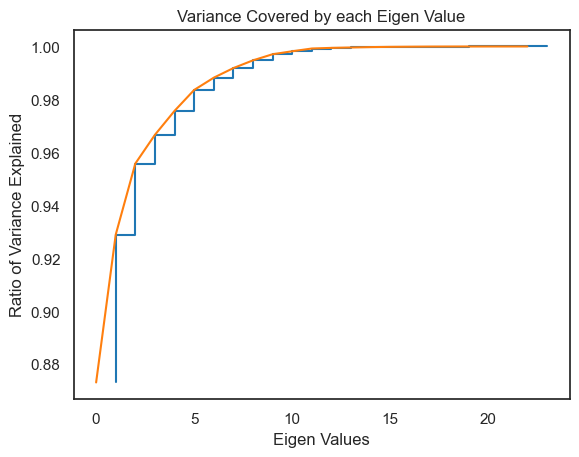

In [23]:
plt.step(list(range(1,24)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

We can find the projection of the dataset onto the principal components call it `Xhat` , this is our "new" dataset, it is the same shape as the original dataset


In [24]:
Xhat = pca.transform(data)
Xhat.shape

(205, 23)

Let’s look at the new dataset as a dataframe.


In [25]:
df_PCA = pd.DataFrame(columns=[f'Projection on Component {i+1}' for i in range(len(data.columns))], data=Xhat)
df_PCA.head()

,Projection on Component 1,Projection on Component 2,Projection on Component 3,Projection on Component 4,Projection on Component 5,Projection on Component 6,Projection on Component 7,Projection on Component 8,Projection on Component 9,Projection on Component 10,...,Projection on Component 14,Projection on Component 15,Projection on Component 16,Projection on Component 17,Projection on Component 18,Projection on Component 19,Projection on Component 20,Projection on Component 21,Projection on Component 22,Projection on Component 23
0,17.626759,35.948034,13.672346,12.095227,3.664801,3.663142,-8.990720,-0.846075,6.721846,-2.405901,...,-3.041921,-0.438453,-1.519718,-0.314425,-1.070602,-0.055977,-0.288358,-0.230038,-0.029076,-0.130253
1,30.577035,45.994860,4.528414,13.389448,4.173425,4.144615,-10.501116,-2.613498,7.595716,-2.293140,...,-3.084248,-0.573956,-1.562546,-0.218821,-1.043913,-0.064826,-0.287224,-0.175538,-0.011494,-0.148088
2,51.187819,30.426549,11.766164,10.552047,10.782123,-16.520919,10.271281,-3.078225,5.575720,-0.066182,...,2.272714,0.998161,-0.292838,-0.587619,-0.498750,0.679581,-0.124265,0.208963,-0.005852,-0.092376
3,14.532539,15.939457,-30.296566,-6.201913,-8.147180,-3.672094,0.529229,5.520515,-0.054090,-1.536205,...,0.130441,0.262727,0.162337,-0.429518,1.097992,-0.275752,-0.420816,-0.141633,0.114982,-0.032288
4,65.902382,14.763992,-6.701051,-2.697221,7.532553,-10.559049,-3.634596,-4.363763,0.379392,0.631173,...,-0.505489,-1.538892,0.348919,-0.299688,1.449970,-0.935642,-0.515098,0.086482,-0.123137,-0.036186


The 3 colored arrows represent the directions of maximum variance in the original data `hwdf`. The new dataset `Xhat` is the projection of `hwdf` onto each principal component.

Most of the original data seems parallel to the red principle components meaning they are the two most dominant directions of variance of `hwdf`. The  green component is perpendicular to the data, as a result the projection is small.


We convert this new data to a Dataframe and see the points appear uncorrelated:


In [26]:
#sns.pairplot(df_PCA)
#plt.show()

In [27]:
df_PCA.corr().style.background_gradient(cmap='coolwarm')

,Projection on Component 1,Projection on Component 2,Projection on Component 3,Projection on Component 4,Projection on Component 5,Projection on Component 6,Projection on Component 7,Projection on Component 8,Projection on Component 9,Projection on Component 10,Projection on Component 11,Projection on Component 12,Projection on Component 13,Projection on Component 14,Projection on Component 15,Projection on Component 16,Projection on Component 17,Projection on Component 18,Projection on Component 19,Projection on Component 20,Projection on Component 21,Projection on Component 22,Projection on Component 23
Projection on Component 1,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000
Projection on Component 2,0.000000,1.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
Projection on Component 3,0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
Projection on Component 4,0.000000,0.000000,-0.000000,1.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
Projection on Component 5,0.000000,-0.000000,-0.000000,-0.000000,1.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
Projection on Component 6,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,1.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000
Projection on Component 7,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,1.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000
Projection on Component 8,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000
Projection on Component 9,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
Projection on Component 10,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000


As you can see, the correlations of the  principal components are now zero, meaning we have successfully de-correlated `hwdf` and obtained features that are linearly independent of each other.

Each component provides variance/information on a different direction. As we saw before that, the third component had a small projection, which means it doesn't provide much information about our original data `hwdf` in the new feature space.

Thus, we can remove the third dimension, while still keeping the vast majority of our data's information:


### Putting it all Together


Now that you have some intuition behind PCA, let's start from the beginning and understand the PCA-pipeline.

In **sklearn.decomposition.PCA**, there is a parameter called `whiten` which helps standardize your input data if you set `whiten = True`. You could also use `StandardScaler()` as a separate step before using PCA.


In [28]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)
X.head()

pca = PCA()
X_PCA = pd.DataFrame(pca.fit_transform(X), index=X.index, columns=[f'Component {i}' for i in range(pca.n_components_)])
# (Remember it's technically "Projection onto Component {i}")
X_PCA.head()

,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,...,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18,Component 19,Component 20,Component 21,Component 22
0,-0.137772,3.571234,-1.744646,-2.117780,-2.404086,-0.179535,-0.834067,-1.167845,0.703236,-0.367294,...,0.497655,-1.306825,-0.329129,0.233138,0.143419,-0.296362,0.185258,-0.039129,-0.105308,0.044866
1,-0.029200,3.593864,-1.773232,-2.098815,-2.412406,-0.167376,-0.801906,-1.127964,0.696820,-0.400447,...,0.512348,-1.345132,-0.316886,0.282843,0.444947,-0.310096,0.140160,-0.058389,-0.174923,0.076411
2,0.992462,2.576664,-0.391977,1.054701,1.001252,0.652715,-1.087533,0.464720,-0.705599,-0.959830,...,0.350233,-0.733924,0.545333,0.456193,0.087555,-0.320848,0.120961,-0.187855,0.201909,-0.202141
3,0.182724,-0.170490,0.403625,0.547088,-0.632710,0.507577,0.620973,1.506872,0.702291,-0.884692,...,0.143382,0.160427,0.179109,0.664339,0.134869,0.589729,-0.265605,-0.129774,0.027020,-0.055126
4,1.580541,0.472308,2.346244,-1.145132,0.364385,-0.535561,1.020837,1.847341,0.927203,-1.436157,...,0.143129,-0.661301,-0.396204,-0.288067,0.348669,0.362424,-0.223320,0.255132,-0.017019,0.193338


By default, `sklearn.decomposition.PCA` sorts the components by their explained variance.

Let's analyze the explained variance ratios:


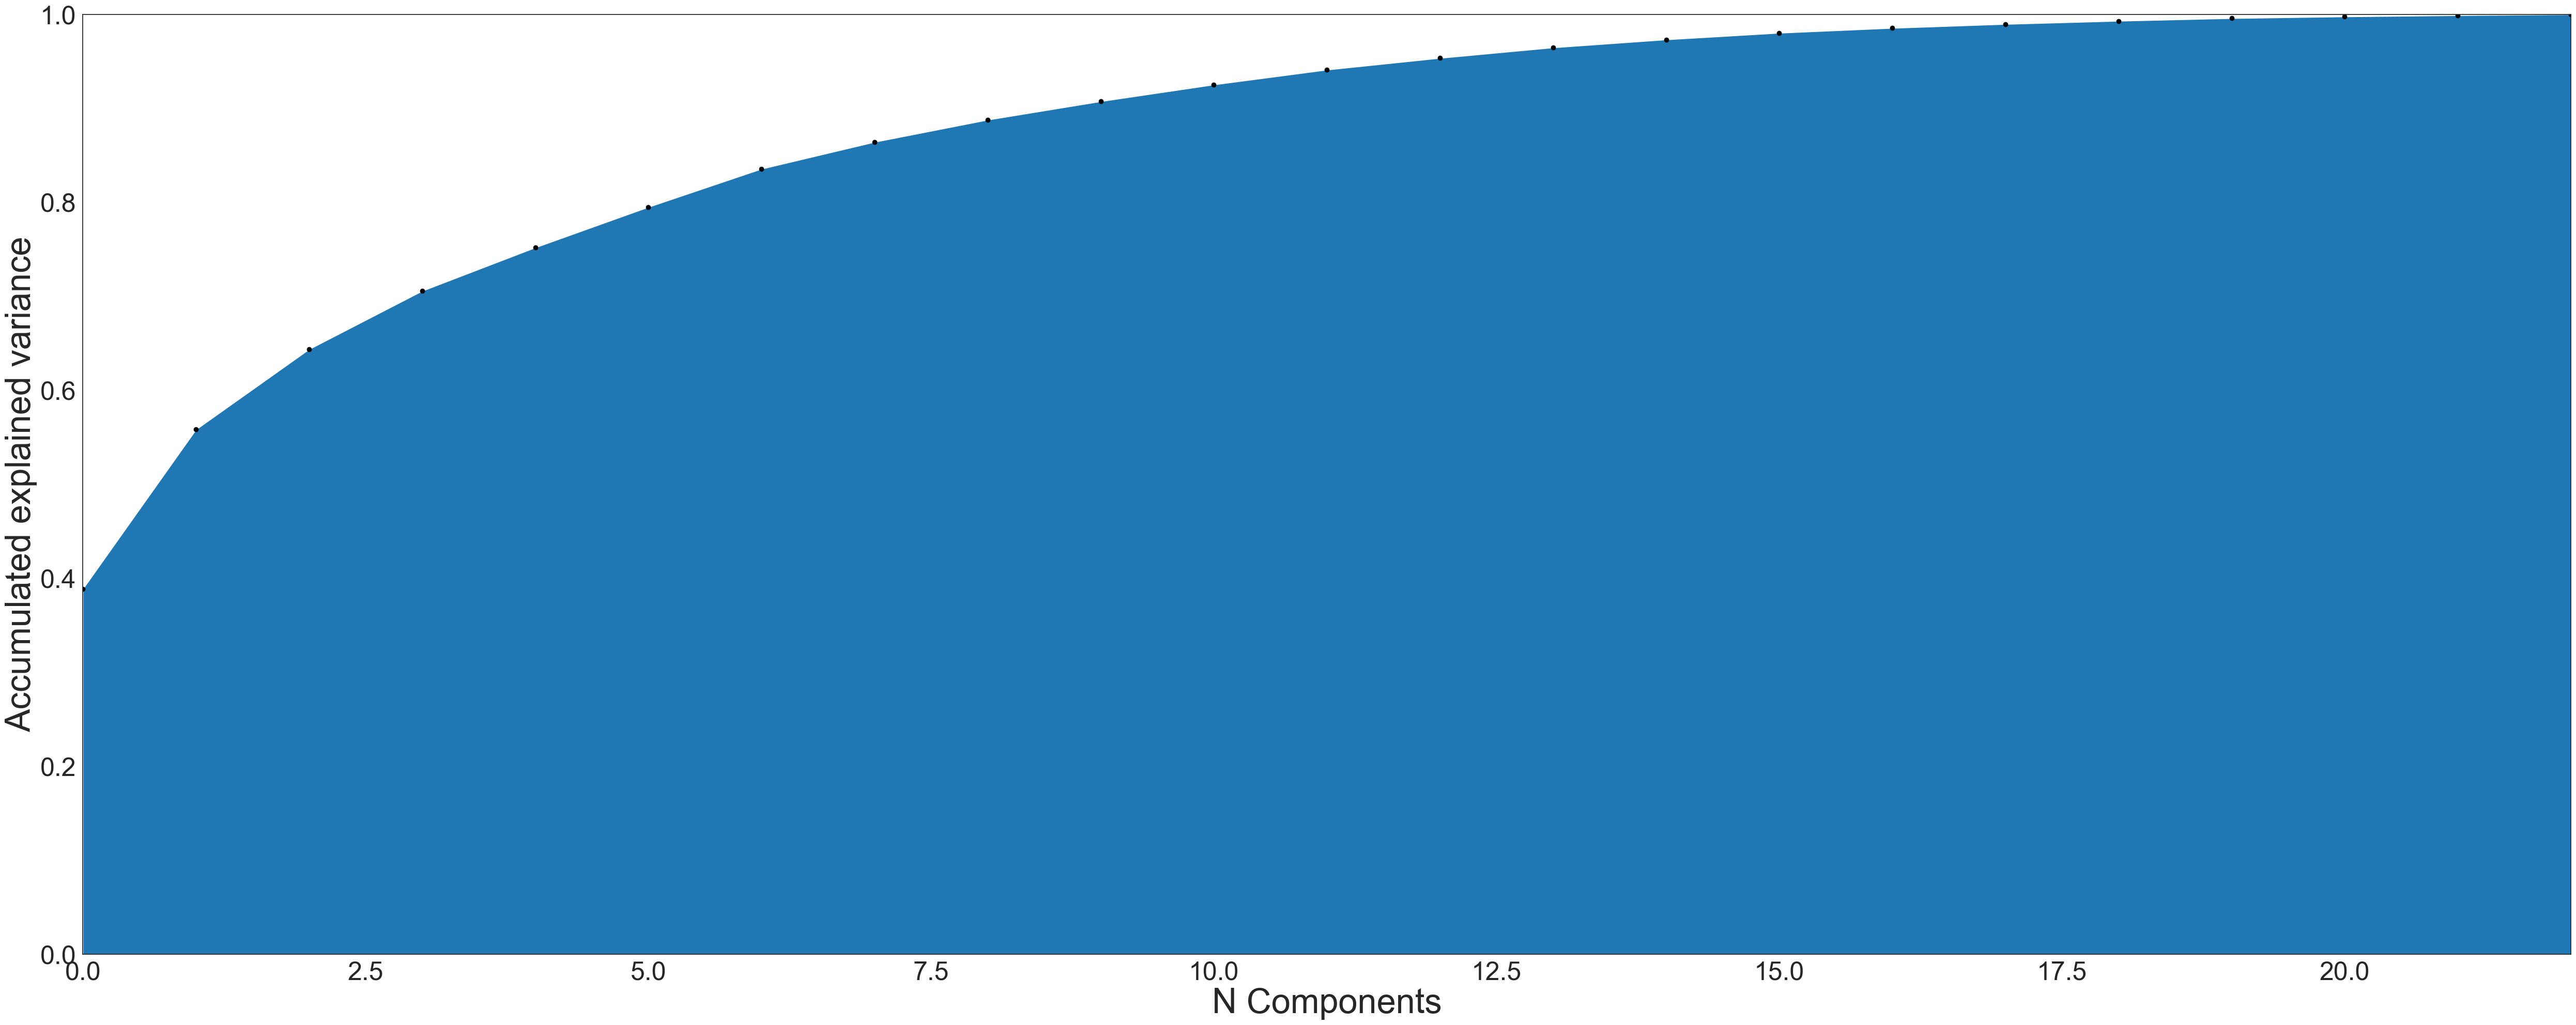

In [29]:
plot_explained_variance(pca)

Suppose a $99%$ threshold is sufficient for our task, let's see how many components (dimensions) we can drop:


In [30]:
threshold = 0.99
num = next(i for i, x in enumerate(accumulate(pca.explained_variance_ratio_), 1) if x >= threshold)
print(f'We can keep the first {num} components and discard the other {pca.n_components_-num},')
print(f'keeping >={100 * threshold}% of the explained variance!')

We can keep the first 19 components and discard the other 4,
keeping >=99.0% of the explained variance!


In [31]:
X_PCA.drop([f'Component {i}' for i in range(num, pca.n_components_)], axis=1, inplace=True)
X_PCA.shape

(205, 19)

Reduce your dataset to one with PCA applied to it, where the new number of dimensions are 19 components

Assign the result to a variable called `reduced_data`. (No need to convert the result to a `pandas.DataFrame`).

Hint: It might be easiest to use a new `PCA` object using the [`n_components` parameter](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01)

In [32]:
pca = PCA(n_components=19)
reduced_data = pca.fit(data).transform(data)

In [33]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 19):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': data.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.873147
2,PCA(n_components=2),0.928949
3,PCA(n_components=3),0.95579
4,PCA(n_components=4),0.966642
5,PCA(n_components=5),0.975681
6,PCA(n_components=6),0.98357
7,PCA(n_components=7),0.988203
8,PCA(n_components=8),0.991828
9,PCA(n_components=9),0.994748


Create a feature importance for each column

In [34]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,aspiration,boreratio,carbody,carheight,carlength,carwidth,citympg,compressionratio,curbweight,cylindernumber,...,enginesize,enginetype,fuelsystem,fueltype,highwaympg,horsepower,peakrpm,price,symboling,wheelbase
n,,,,,,,,,,,,,,,,,,,,,
1,0.000675,0.036048,0.000404,0.023395,0.099635,0.050677,0.027298,0.006061,0.255561,0.000028,...,0.049788,0.000257,0.007555,0.000265,0.026861,0.067830,0.005043,0.281919,0.001136,0.057241
2,0.000393,0.023228,0.004784,0.098371,0.119597,0.044991,0.023860,0.011322,0.183738,0.002099,...,0.026631,0.001575,0.006963,0.000984,0.019080,0.076424,0.025935,0.227642,0.006963,0.090707
3,0.000530,0.030281,0.004848,0.117273,0.094779,0.031887,0.028008,0.029850,0.182264,0.002044,...,0.039513,0.001571,0.006268,0.001276,0.024001,0.083378,0.018411,0.203775,0.006860,0.088719
4,0.000566,0.032302,0.004453,0.090855,0.102459,0.031473,0.041751,0.071465,0.162421,0.002167,...,0.030968,0.001324,0.008421,0.002899,0.035299,0.100446,0.032036,0.154794,0.005817,0.083897
5,0.000858,0.032030,0.004311,0.117982,0.110451,0.047543,0.041815,0.077451,0.142364,0.001820,...,0.035790,0.001555,0.007263,0.002783,0.036113,0.085771,0.033121,0.124767,0.004914,0.086667
6,0.000867,0.082955,0.004472,0.112772,0.101624,0.047597,0.038513,0.073904,0.132202,0.002139,...,0.042382,0.002163,0.006831,0.002487,0.034071,0.077369,0.040776,0.109679,0.004453,0.077884
7,0.001016,0.085697,0.004452,0.110384,0.092235,0.042732,0.039287,0.078723,0.119259,0.002671,...,0.070920,0.002575,0.006552,0.002407,0.034425,0.092137,0.035338,0.098050,0.004519,0.071221
8,0.001227,0.080448,0.004556,0.099575,0.092030,0.037739,0.037575,0.093643,0.106090,0.004368,...,0.075284,0.002280,0.006264,0.002192,0.032080,0.091071,0.057745,0.089683,0.005561,0.075117
9,0.001687,0.076318,0.004155,0.089915,0.105935,0.048485,0.033919,0.087139,0.097604,0.004089,...,0.076148,0.002648,0.006172,0.002155,0.031786,0.085585,0.061545,0.081736,0.006787,0.090472


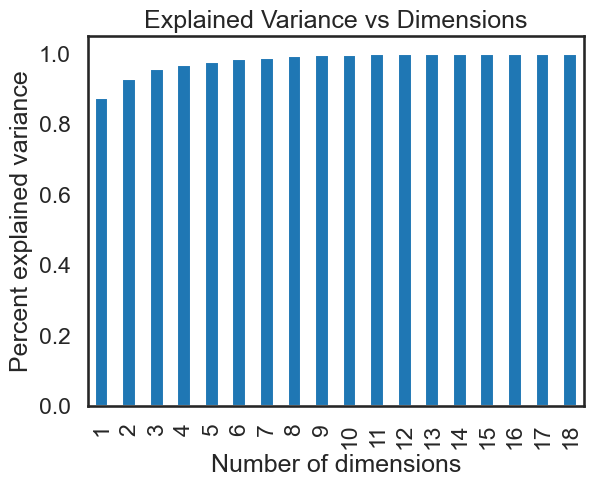

In [35]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

In [36]:
x_data = pd.DataFrame(reduced_data, columns=[f'Component {i}' for i in range(reduced_data.shape[1])])
x_data.head()

,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Component 12,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18
0,17.626759,35.948034,13.672346,12.095227,3.664801,3.663142,-8.990720,-0.846075,6.721846,-2.405901,0.271125,-1.704131,1.907883,-3.041921,-0.438453,-1.519718,-0.314425,-1.070602,-0.055977
1,30.577035,45.994860,4.528414,13.389448,4.173425,4.144615,-10.501116,-2.613498,7.595716,-2.293140,0.483295,-1.213872,1.638959,-3.084248,-0.573956,-1.562546,-0.218821,-1.043913,-0.064826
2,51.187819,30.426549,11.766164,10.552047,10.782123,-16.520919,10.271281,-3.078225,5.575720,-0.066182,-2.701974,-4.206620,-0.780110,2.272714,0.998161,-0.292838,-0.587619,-0.498750,0.679581
3,14.532539,15.939457,-30.296566,-6.201913,-8.147180,-3.672094,0.529229,5.520515,-0.054090,-1.536205,-1.364653,-3.366036,1.430098,0.130441,0.262727,0.162337,-0.429518,1.097992,-0.275752
4,65.902382,14.763992,-6.701051,-2.697221,7.532553,-10.559049,-3.634596,-4.363763,0.379392,0.631173,4.704358,0.770100,0.981874,-0.505489,-1.538892,0.348919,-0.299688,1.449970,-0.935642


### K-MEANS Clustering

K Means Clustering is an unsupervised machine learning algorithm that organizes data into distinct groups based on certain similarities. The principle underlying the algorithm is simple to understand and is a great introduction to the potential of unsupervised learning algorithms for exploratory data analysis. In this lab, we will brush up on the basic theory underlying the algorithm and then go ahead and apply it ourselves to a real problem.

#### Steps involved in the Clustering

Elbow Method to determine the number of clusters to be formed
Clustering via Agglomerative Clustering
Examining the clusters formed via scatter plot

In [37]:
#!pip install yellowbrick

In [38]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Elbow Method to determine the number of clusters to be formed:


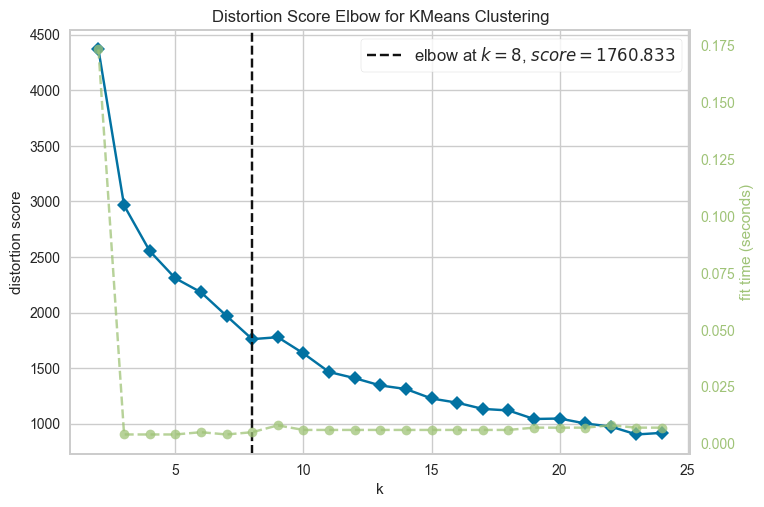

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=24)
Elbow_M.fit(X_PCA)
Elbow_M.show()

The above cell indicates that 8 will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [47]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=8)
# fit model and predict clusters
yhat_AC = AC.fit_predict(reduced_data)
X_PCA["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

In [48]:
X = data["price"]
y = data["horsepower"]
z = data["enginesize"]


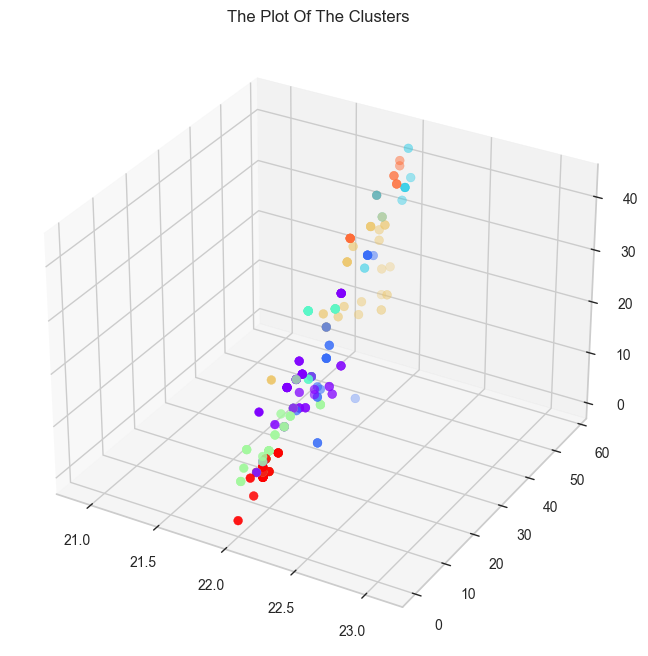

In [49]:
#Plotting the clusters
pal = sns.color_palette("Set2",12)
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=X_PCA["Clusters"], marker='o',  cmap= 'rainbow')
ax.set_title("The Plot Of The Clusters")
plt.show()

## Model Evaluation

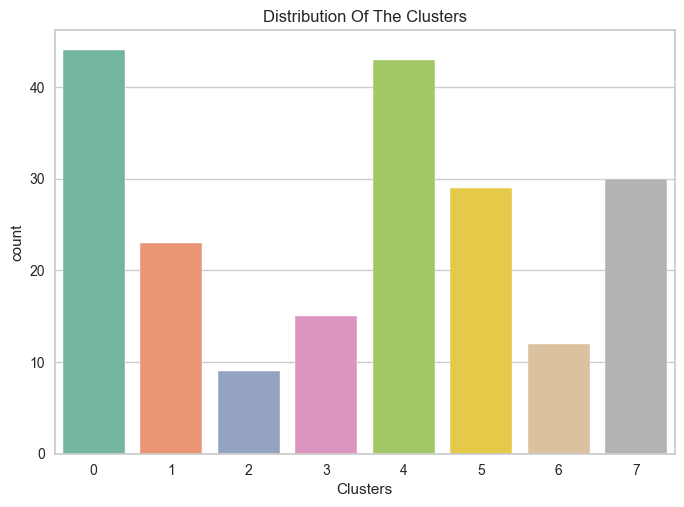

In [50]:
#Plotting countplot of clusters
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

The above cell indicates that 8 will be an optimal number of clusters for this data. 
In which we found out 0 and 4 to be the highest follow by 7,5 and 1


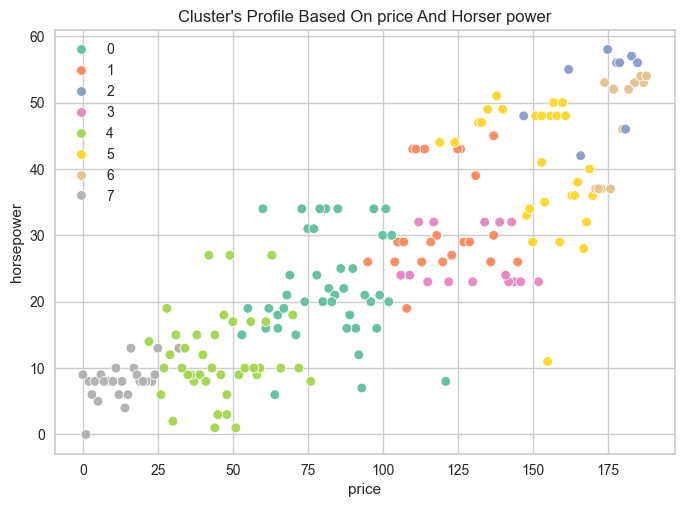

In [51]:
pl = sns.scatterplot(data = data,x=data["price"], y=data["horsepower"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On price And Horser power")
plt.legend()
plt.show()

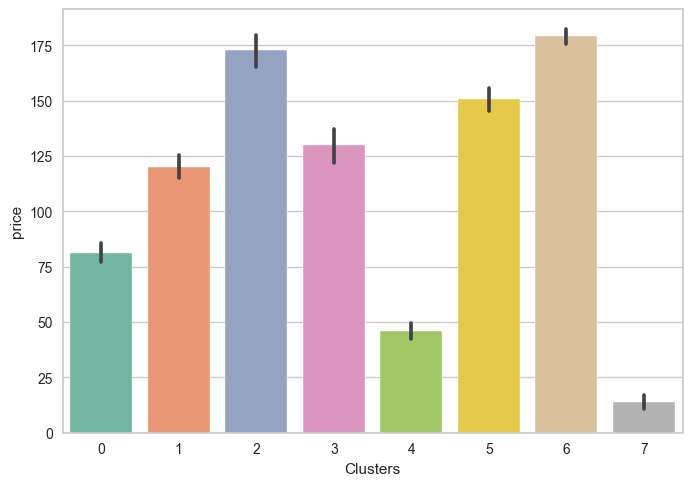

In [52]:
plt.figure()
#pl=sns.boxplot(x=data["Clusters"], y=data["price"], color= "#CBEDDD" )
sns.barplot(x=data["Clusters"], y=data["price"], palette=pal)
plt.show()

Clusters versus price columns, which has produced a part of consumer spending behavior classification. The higher spending patterns of the customers are displayed in clusters 2 and 5. and 4 and 7 are the customers who spend the least.

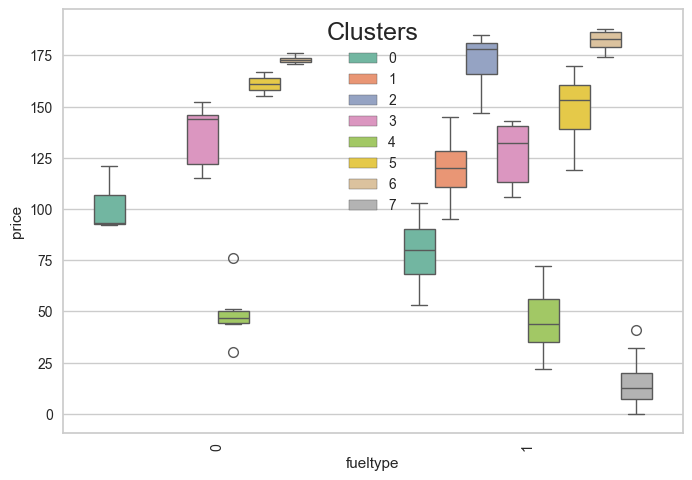

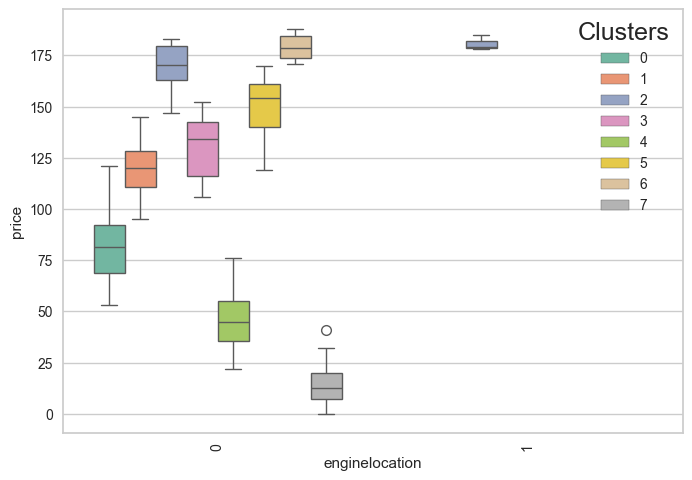

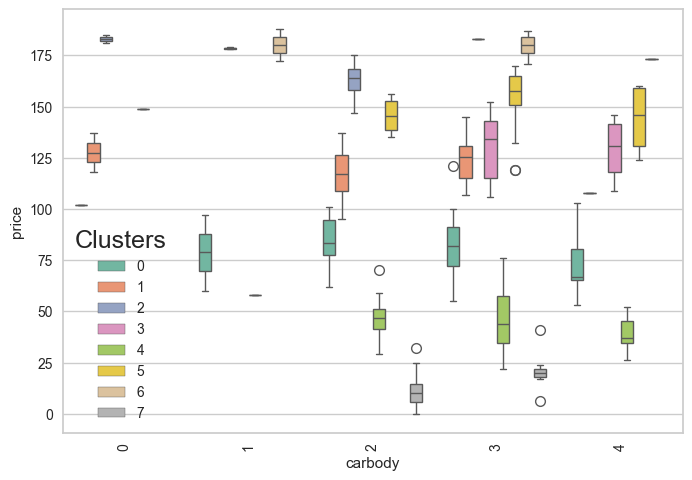

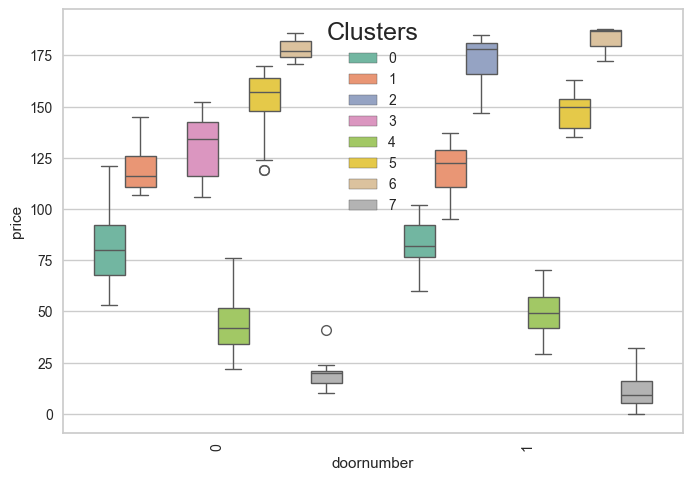

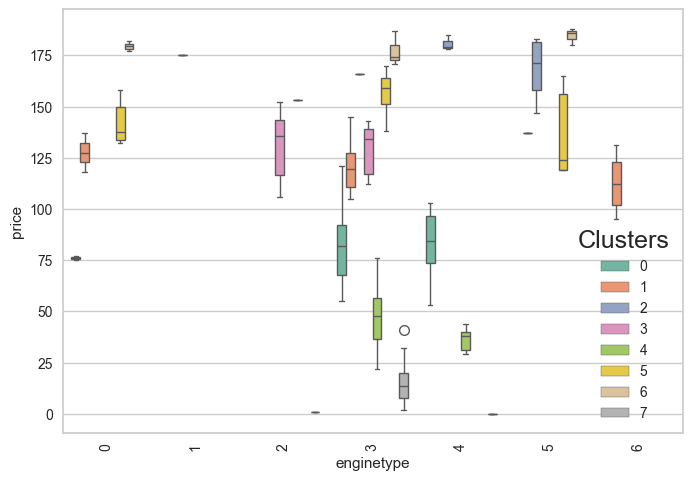

In [53]:
df_columns = [ "fueltype","enginelocation","carbody", "doornumber", "enginetype",]

for i in df_columns:
    plt.figure()
    sns.boxplot(x=data[i], y=data["price"], hue =data["Clusters"],  palette=pal)
    plt.xticks(rotation=90)
    plt.show()

## Conclusion

In this project we apply PCA and the K-means clustering algorithm.
The principal components analysis (PCA) has done very successful work accordingly and reduced the dataset features from 23 to 19 features with the 99% threshold set.
The K-means clustering algorithm has managed to detect 8 clusters, Clusters versus price columns, which has produced a part of consumer spending behavior classification. The higher spending patterns of the customers are displayed in clusters 2 and 5. and 4 and 7 are the customers who spend the least.


## Recommendation
Based on the founding of the Principal Components Analysis (PCA), I think we'll need set even more parameters to reduce the number of features from 19 even to a lower number for a better outcome. 
For K-means clustering to perform even better.
